In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib_inline as plt
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model,to_categorical
from keras import backend
from keras.layers import Dense
from keras.layers.convolutional import conv2d,MaxPooling2D
from keras.layers import activation,Flatten
import warnings
warnings.filterwarnings('ignore')
import random
random.seed(0)

In [2]:
tf.__version__

'2.12.0'

In [3]:
from keras.datasets import mnist
(X_train,y_train),(X_test,y_test) = mnist.load_data() 

11490434/11490434 [==============================] - 2s 0us/step


Label: 0


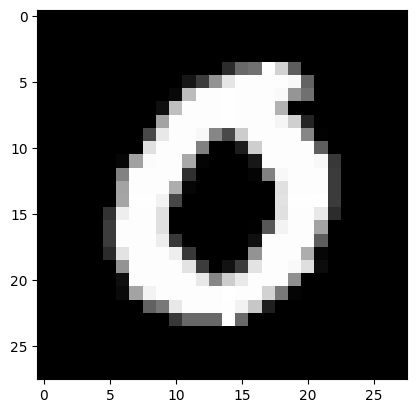

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
print('Label: {}'.format(y_train[8000]))
plt.imshow(X_train[8000],cmap = 'gray')

# Data preprocessing

In [5]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [6]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [7]:
X_train.shape

(60000, 28, 28, 1)

In [8]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /=255
X_test /=255

In [9]:
print("X_train shape:", X_train.shape)
print("Images in X_train:", X_train.shape[0])
print("Images in X_test:", X_test.shape[0])
print("Max value in X_train:", X_train.max())
print("Min value in X_train:", X_train.min())

X_train shape: (60000, 28, 28, 1)
Images in X_train: 60000
Images in X_test: 10000
Max value in X_train: 1.0
Min value in X_train: 0.0


In [10]:
from keras.utils import to_categorical
y_train = to_categorical(y_train,num_classes=10)
y_test = to_categorical(y_test,num_classes=10)

In [11]:
print("Shape of y_train:", y_train.shape)
print("One value of y_train:", y_train[0])

Shape of y_train: (60000, 10)
One value of y_train: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## CNN

In [12]:
from keras.layers import Conv2D
model = Sequential()
model.add(Conv2D(filters =32,kernel_size=3,activation='relu',input_shape =(28, 28, 1 )))
model.add(Conv2D(filters =32,kernel_size=3,activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [13]:
# Compile the model
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

# Fit the model
H = model.fit( x=X_train, y=y_train, batch_size=32, epochs=10, validation_split = 0.3)

Epoch 1/10
1313/1313 [==============================] - 18s 6ms/step - loss: 0.1346 - accuracy: 0.9585 - val_loss: 0.0645 - val_accuracy: 0.9807
Epoch 2/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0402 - accuracy: 0.9872 - val_loss: 0.0634 - val_accuracy: 0.9822
Epoch 3/10
1313/1313 [==============================] - 8s 6ms/step - loss: 0.0237 - accuracy: 0.9921 - val_loss: 0.0631 - val_accuracy: 0.9824
Epoch 4/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0150 - accuracy: 0.9955 - val_loss: 0.0686 - val_accuracy: 0.9805
Epoch 5/10
1313/1313 [==============================] - 7s 5ms/step - loss: 0.0102 - accuracy: 0.9966 - val_loss: 0.0718 - val_accuracy: 0.9837
Epoch 6/10
1313/1313 [==============================] - 8s 6ms/step - loss: 0.0088 - accuracy: 0.9970 - val_loss: 0.1020 - val_accuracy: 0.9797
Epoch 7/10
1313/1313 [==============================] - 7s 5ms/step - loss: 0.0078 - accuracy: 0.9971 - val_loss: 0.0820 - val_accuracy

In [14]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0686 - accuracy: 0.9869


[0.06855926662683487, 0.9868999719619751]

In [15]:
loss, acc = model.evaluate(X_test, y_test)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

313/313 [==============================] - 1s 3ms/step - loss: 0.0686 - accuracy: 0.9869

Test accuracy: 98.7%


In [16]:
loss, acc = model.evaluate(X_train, y_train)
print("\nTrain accuracy: %.1f%%" % (100.0 * acc))

1875/1875 [==============================] - 5s 3ms/step - loss: 0.0279 - accuracy: 0.9947

Train accuracy: 99.5%


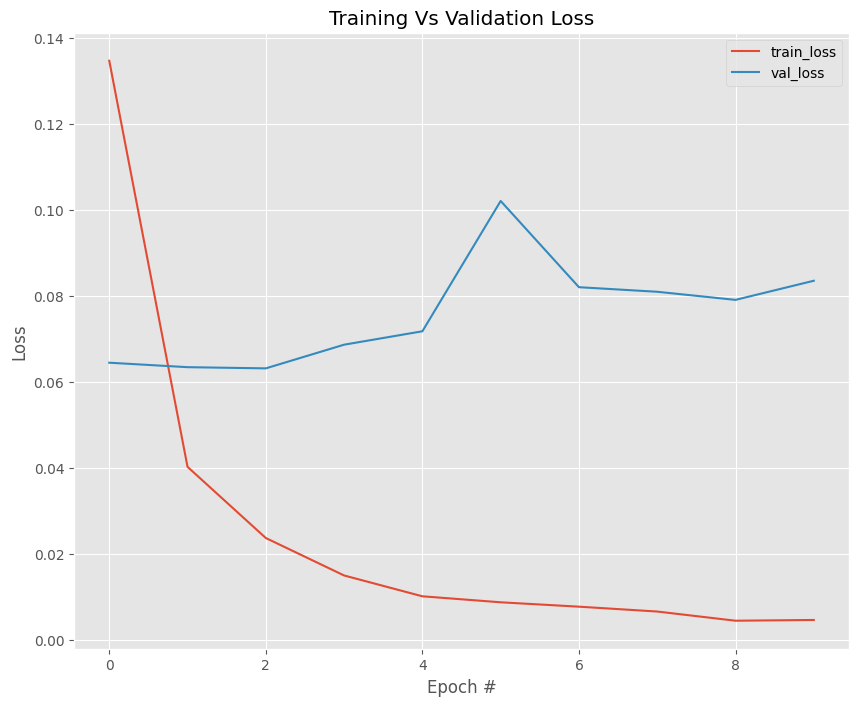

In [17]:
import matplotlib.pyplot as plt

epochs = np.arange(0, len(H.history["loss"]))
plt.figure(figsize=(10,8))
plt.style.use("ggplot")

# plot training and validation loss
plt.plot(epochs, H.history["loss"], label="train_loss")
plt.plot(epochs, H.history["val_loss"], label="val_loss")
plt.title("Training Vs Validation Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()


In [18]:
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense
from keras.models import Sequential

# Initialize the model
model = Sequential()

# Add a convolutional layer with 32 filters, a kernel size of 3, and ReLU activation
# The input shape is 28x28x1 since the images are greyscale and have dimensions 28x28
model.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))

# Add another convolutional layer with 32 filters and a kernel size of 3
model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))

# Add a max pooling layer with a pool size of 2x2
model.add(MaxPool2D(pool_size=(2, 2)))

# Add a dropout layer with a rate of 0.2
model.add(Dropout(0.2))

# Flatten the output from the convolutional layers
model.add(Flatten())

# Add a fully connected layer with 128 neurons and ReLU activation
model.add(Dense(128, activation='relu'))

# Add the output layer with 10 neurons (one for each class) and softmax activation
model.add(Dense(10, activation='softmax'))


In [20]:
import tensorflow
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

callback = tensorflow.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2, min_delta=0.01)

H = model.fit(x=X_train,y=y_train,epochs=10,batch_size=32,validation_data=(X_test,y_test),callbacks=[callback])

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1267 - accuracy: 0.9614 - val_loss: 0.0474 - val_accuracy: 0.9843
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0442 - accuracy: 0.9862 - val_loss: 0.0338 - val_accuracy: 0.9894
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0294 - accuracy: 0.9907 - val_loss: 0.0301 - val_accuracy: 0.9903


In [22]:
loss, acc = model.evaluate(X_test, y_test)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

313/313 [==============================] - 1s 4ms/step - loss: 0.0301 - accuracy: 0.9903

Test accuracy: 99.0%


In [23]:
loss, acc = model.evaluate(X_train, y_train)
print("\nTrain accuracy: %.1f%%" % (100.0 * acc))

1875/1875 [==============================] - 6s 3ms/step - loss: 0.0137 - accuracy: 0.9961

Train accuracy: 99.6%


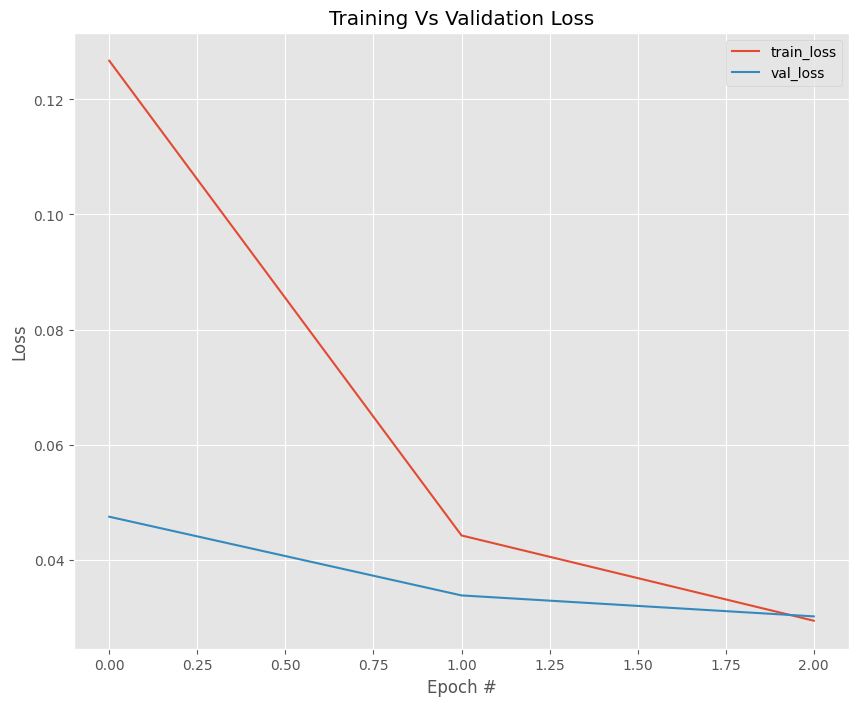

In [21]:
import matplotlib.pyplot as plt

epochs = np.arange(0, len(H.history["loss"]))
plt.figure(figsize=(10,8))
plt.style.use("ggplot")

# plot training and validation loss
plt.plot(epochs, H.history["loss"], label="train_loss")
plt.plot(epochs, H.history["val_loss"], label="val_loss")
plt.title("Training Vs Validation Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()

1/1 [==============================] - 0s 149ms/step
Predicted label: 6
Softmax Outputs: [[3.1038629e-09 1.3840065e-09 1.7619002e-11 3.3991806e-13 1.3792059e-08
  1.7738013e-07 9.9999976e-01 3.1217903e-11 3.5815371e-09 2.1954360e-11]]
0.99999994


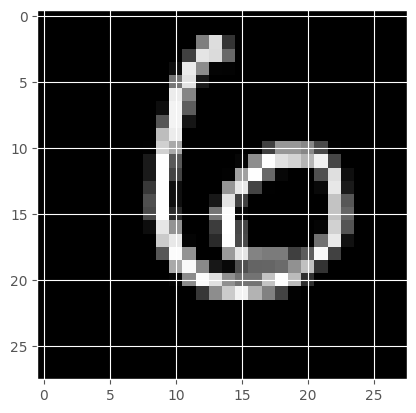

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_test[100].reshape(28,28),cmap = 'gray')
y_pred  = model.predict(X_test[100].reshape(1,28,28,1))#No.of images, Height, width, channel
print("Predicted label:", y_pred.argmax())
print("Softmax Outputs:", y_pred)
print(y_pred.sum())